# Mulilayer Perceptrons

This week we'll look at building multilayer perceptron classifiers in scikit-learn. Scikit-learn is only suitable for simple artificial neural networks. For more complex, deeper or very large datasets, you should instead look at TensorFlow, Keras or PyTorch.

There is a nice description of neural networks at the user guide: https://scikit-learn.org/stable/modules/neural_networks_supervised.html

`MLPClassifier` is the class that you want this time. As with the SVM, MLPs are a bit sensitive to parameter settings and the topology of the network. Data should be normalised and you might want to look at regularisation to avoid overtraining. The user guide gives tips for getting them to work more effectively.

First off, let's import the packages we want and load the data file as we have done previously. Then we'll take a look with `head()` to see if it looks ok.

**Remember to change `DATAFILE` below**

In [68]:
import sklearn as sk
import pandas as pd

DATAFILE = '/Users/paul/OneDrive - UTS/uni/teaching/IDA21A (FDA)/lectures/week7/iris.csv'
iris = pd.read_csv(DATAFILE)

In [69]:
iris.head()

,Row,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


Let's now split the data into an `X` and `y` and then create a training and test split.

In [70]:
# Make the target numeric, and create training and test sets.
targets = iris['Species'].unique()
target2code = dict(zip(targets, range(len(targets))))

X = iris.iloc[:,1:-1] # strip off the row number and target.
y = iris.iloc[:,-1].copy() # don't want to overwrite the original 
y = y.apply(lambda x: target2code[x]) # convert each 

# Now split these into a training / test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Note: random_state=0 is set solely so that you and I will get the same set of random
# numbers and hence the same test set and the same results. Normally you wouldn't set it.

print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (105, 4)
y_train: (105,)
X_test: (45, 4)
y_test: (45,)


In [71]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Don't cheat - fit only on training data
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train))

# apply same transformation to test data
X_test = pd.DataFrame(scaler.transform(X_test))

# X_train
# X_test

# MLPClassifier


`sklearn.neural_network.MLPClassifier` is the class we want.

As usual, to get started we'll just use the default parameters and then `fit` the data to the classifier. However, do look at the web page and have a play around.

Some parameters of interest to pass to the classifier are:
* `hidden_layer_sizes` is a tuple with the number of neurons in each hidden layer.
* `activation` is the activation function for the hidden layer. The ones of interest are `logistic` which is the sigmoid function, `tanh` or `relu`. See details in the user guide.
* `solver` is algorithm to use for finding the weights. `adam` generally works pretty well. Again, the user guide goes into the pros and cons for these.
* `alpha` controls the amount of regularisation. Large values force more regularisation. The default is probably a good choice. Otherwise, you may need to set using the `sklearn.model_selection.GridSearchCV` class as we discussed last week with the SVM parameters.
* `learning_rate`, `learning_rate_init`, `momentum`, `nesterovs_momentum`, `power_t` are only useful if you use the sgd (stochastic gradient descent) solver. By default you probably won't need to work with them.
* `verbose=True` gives you more output to be able to see how the training is going.

You probably want to control when the training stops. It is usually better to do early stopping so that you do not overtrain the network. Early stopping makes a validation split, then stops training when the loss on the validation set stops decreasing a specific number of times in a row. Otherwise it will be very difficult to understand how to set `max_iter`, the maximum number of iterations in the solver. Early stopping only works for the adam and sgd solvers.

You can turn on early stopping by setting `early_stopping=True`. `tol` is the tolerance for changes in the loss function. The default is probably OK. `validation_fraction` is the fraction of the dataset to use for validation. `n_iter_no_change` is the number of epochs to stop after if the loss does not improve.

In [72]:
from sklearn.neural_network import MLPClassifier

# Works, but is it overtraining?
clf = MLPClassifier(hidden_layer_sizes=(2,2), random_state=0, verbose=True, max_iter=5000)

# Note: random_state=0 is set solely so that you and I will get the same set of random
# numbers and hence the same initial weights for the network and the same results.
# Normally you wouldn't set it.

# Too few iterations
# clf = MLPClassifier(hidden_layer_sizes=(2,2), verbose=False, max_iter=1000)

# Does not converge (topology too simple)
# clf = MLPClassifier(hidden_layer_sizes=(2), verbose=True) # does not converge ... topology too simple.

# 100 neurons in the hidden layer, doesn't converge
# clf = MLPClassifier(verbose=True)

# 100 neurons in the hidden layer, converges
# clf = MLPClassifier(verbose=False, max_iter=2000)

# (2,2), stops very (too) early. 
#clf = MLPClassifier(hidden_layer_sizes=(2,2), early_stopping=True, max_iter=2000,
#                    validation_fraction=0.1, verbose=True)
# Q: What do you think is happening?


clf.fit(X_train, y_train)

Iteration 1, loss = 1.37272261
Iteration 2, loss = 1.37052521
Iteration 3, loss = 1.36845116
Iteration 4, loss = 1.36639332
Iteration 5, loss = 1.36435956
Iteration 6, loss = 1.36234526
Iteration 7, loss = 1.36034662
Iteration 8, loss = 1.35839567
Iteration 9, loss = 1.35656985
Iteration 10, loss = 1.35486460
Iteration 11, loss = 1.35318115
Iteration 12, loss = 1.35151791
Iteration 13, loss = 1.34987363
Iteration 14, loss = 1.34824735
Iteration 15, loss = 1.34669760
Iteration 16, loss = 1.34517343
Iteration 17, loss = 1.34366740
Iteration 18, loss = 1.34217879
Iteration 19, loss = 1.34070694
Iteration 20, loss = 1.33925132
Iteration 21, loss = 1.33781142
Iteration 22, loss = 1.33638683
Iteration 23, loss = 1.33497718
Iteration 24, loss = 1.33358212
Iteration 25, loss = 1.33220136
Iteration 26, loss = 1.33084676
Iteration 27, loss = 1.32950685
Iteration 28, loss = 1.32818091
Iteration 29, loss = 1.32687976
Iteration 30, loss = 1.32564334
Iteration 31, loss = 1.32444738
Iteration 32, los

Iteration 542, loss = 0.55213446
Iteration 543, loss = 0.55177261
Iteration 544, loss = 0.55141095
Iteration 545, loss = 0.55104947
Iteration 546, loss = 0.55068816
Iteration 547, loss = 0.55032703
Iteration 548, loss = 0.54996607
Iteration 549, loss = 0.54960528
Iteration 550, loss = 0.54924465
Iteration 551, loss = 0.54888420
Iteration 552, loss = 0.54852390
Iteration 553, loss = 0.54816364
Iteration 554, loss = 0.54780351
Iteration 555, loss = 0.54744352
Iteration 556, loss = 0.54708367
Iteration 557, loss = 0.54672395
Iteration 558, loss = 0.54636436
Iteration 559, loss = 0.54600490
Iteration 560, loss = 0.54564548
Iteration 561, loss = 0.54528611
Iteration 562, loss = 0.54492685
Iteration 563, loss = 0.54456769
Iteration 564, loss = 0.54420862
Iteration 565, loss = 0.54384965
Iteration 566, loss = 0.54349078
Iteration 567, loss = 0.54313200
Iteration 568, loss = 0.54277332
Iteration 569, loss = 0.54241472
Iteration 570, loss = 0.54205620
Iteration 571, loss = 0.54169777
Iteration 

Iteration 1148, loss = 0.29298685
Iteration 1149, loss = 0.29260260
Iteration 1150, loss = 0.29221867
Iteration 1151, loss = 0.29183508
Iteration 1152, loss = 0.29145183
Iteration 1153, loss = 0.29106892
Iteration 1154, loss = 0.29068636
Iteration 1155, loss = 0.29030416
Iteration 1156, loss = 0.28992232
Iteration 1157, loss = 0.28954089
Iteration 1158, loss = 0.28916000
Iteration 1159, loss = 0.28877951
Iteration 1160, loss = 0.28839935
Iteration 1161, loss = 0.28801955
Iteration 1162, loss = 0.28764010
Iteration 1163, loss = 0.28726100
Iteration 1164, loss = 0.28688226
Iteration 1165, loss = 0.28650389
Iteration 1166, loss = 0.28612589
Iteration 1167, loss = 0.28574854
Iteration 1168, loss = 0.28537128
Iteration 1169, loss = 0.28499465
Iteration 1170, loss = 0.28461837
Iteration 1171, loss = 0.28424244
Iteration 1172, loss = 0.28386688
Iteration 1173, loss = 0.28349169
Iteration 1174, loss = 0.28311687
Iteration 1175, loss = 0.28274242
Iteration 1176, loss = 0.28236835
Iteration 1177

Iteration 1684, loss = 0.15043997
Iteration 1685, loss = 0.15027853
Iteration 1686, loss = 0.15011757
Iteration 1687, loss = 0.14995665
Iteration 1688, loss = 0.14979578
Iteration 1689, loss = 0.14963499
Iteration 1690, loss = 0.14947508
Iteration 1691, loss = 0.14931521
Iteration 1692, loss = 0.14915629
Iteration 1693, loss = 0.14899648
Iteration 1694, loss = 0.14883834
Iteration 1695, loss = 0.14868019
Iteration 1696, loss = 0.14852204
Iteration 1697, loss = 0.14836391
Iteration 1698, loss = 0.14820583
Iteration 1699, loss = 0.14804783
Iteration 1700, loss = 0.14789037
Iteration 1701, loss = 0.14773363
Iteration 1702, loss = 0.14757676
Iteration 1703, loss = 0.14742059
Iteration 1704, loss = 0.14726444
Iteration 1705, loss = 0.14710833
Iteration 1706, loss = 0.14695369
Iteration 1707, loss = 0.14679825
Iteration 1708, loss = 0.14664280
Iteration 1709, loss = 0.14648844
Iteration 1710, loss = 0.14633407
Iteration 1711, loss = 0.14617973
Iteration 1712, loss = 0.14602545
Iteration 1713

MLPClassifier(hidden_layer_sizes=(2, 2), max_iter=5000, random_state=0,
              verbose=True)

Let's look at the classifier, then look at the prediction for a particular point in the test set.

In [73]:
# We can print the classifier like this.
print(clf)

# There are some attributes set, which I'll let you look at.
# Essentially you can explore all the weight settings and intercepts.
# But it isn't easy to understand.

# Let's look at one specific prediction.
test_idx = 21
test_point = X_test.iloc[test_idx]

pred_test = clf.predict([test_point])
pred_test_probs = clf.predict_proba([test_point]) # only works if probability=True in constructor

#print("Testing point", test_idx, "; predicted as", pred_test[0],
#      "; actually", y_test.iloc[test_idx])

print("Testing point", test_idx, "; predicted as", pred_test[0],
      "; actually", y_test.iloc[test_idx], "; probabilities", pred_test_probs[0])

MLPClassifier(hidden_layer_sizes=(2, 2), max_iter=5000, random_state=0,
              verbose=True)
Testing point 21 ; predicted as 1 ; actually 1 ; probabilities [1.36202827e-04 9.22792767e-01 7.70710306e-02]


Like we did last week, let's make predictions for the test partition, print the classification report and the confusion matrix.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



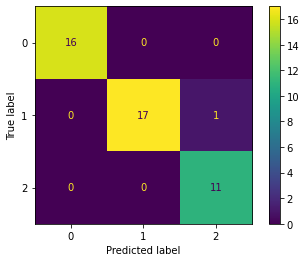

In [74]:
y_pred = clf.predict(X_test)

# Confusion matrix
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report

print(classification_report(y_test, y_pred))

plot_confusion_matrix(clf, X_test, y_test);

Finally, let's plot the ROC curve and work out the AUC value.

Because `iris` is a multi-class problem it's a bit trickier. We're goint to try to plot an ROC curve for each class (one vs the rest). First we need to work out the probabilities for the classes for each test point.

Then we use the `roc_auc_score` function to work out the AUC value.

Plotting the ROC curve is a bit more cumbersome. We need to loop over each class and then use the `roc_curve` function to return the TPRs and FPRs corresponding to a set of decision thresholds for that class vs the rest.

The AUC is 0.999


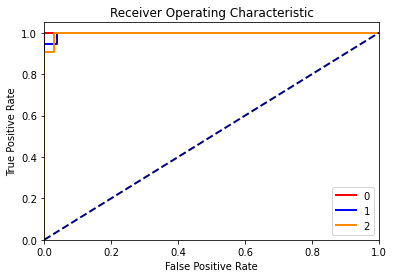

In [75]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get the probabilities of each class.
y_probs = clf.predict_proba(X_test)

# The AUC score needs to be handled differently to get one number out of the three classes.
# We're going to average it over the three classes (one vs rest) weighted by the size of each
# class. The help gives the other option: ovo.
# auc = roc_auc_score(y_test, y_probs, multi_class="ovo", average="weighted")
auc = roc_auc_score(y_test, y_probs, multi_class="ovr", average="weighted")
print('The AUC is %.3f' % auc)

# Now let's plot the ROC curve.
import matplotlib.pyplot as plt
plt.figure()
col = { 0: "red", 1: "blue", 2:"darkorange"} # colour for each class
lw = 2 # the line width
# draw a line for each class (as the positive class)
for pos in range(3):
     fpr, tpr, thresholds = roc_curve(y_test, y_probs[:,pos], pos_label=pos)
     plt.plot(fpr, tpr, color=col[pos], lw=lw, label='%d' % pos)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--') # The dashed line for random choice
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

As you can see they are very sensitive to parameters. Also, this dataset is really a bit too small. How to proceed? I would train using the entire training set but with early stopping (because it is such a small dataset). I would use a grid search CV to work out the best topology and parameter settings.

The MLP is likely to do better on a bigger real world problem like your assignment.
